In [1]:
%matplotlib inline
import sympy as sym
import pylab as pl
import numpy as np
import numpy.polynomial.polynomial as n_poly
import numpy.polynomial.legendre as leg

# Mindflow

We want the best approximation (in Hilbert Spaces) of the function $f$, on the space $V = \mathrm{span}\{v_i\}$. Remember that $p\in V$ is best approximation of $f$ if and only if:

$$
(p-f,q)=0, \quad \forall q\in V.
$$

Focus one second on the fact that both $p$ and $q$ belong to $V$. We know that any $q$ can be expressed as a linear combination of the basis functions $v_i$:

$$
(p-f,v_i)=0, \quad \forall v_i\in V.
$$

Moreover $p$ is uniquely defined by the coefficients $p^j$ such that $p = p^j\,v_j$. Collecting this information together we get:

$$
(v_j,v_i) p^j = (f,v_i),\quad \forall v_i\in V.
$$

Now that we know our goal (finding these $p^j$ coefficients) we do what the rangers do: we explore!

We understand that we will need to invert the matrix:

$$
M_{ij} = (v_j,v_i) = \int v_i\cdot v_j
$$

What happens if we choose basis functions such that $(v_j,v_i) =  \delta_{ij}$?

How to construct numerical techniques to evaluate integrals in an efficient way?

Evaluate the $L^2$ projection.

## Orthogonal Polynomials

Grham Schmidt

$$
p_0(x) = 1, \qquad p_k(x) = x^k - \sum_{j=0}^{k-1} \frac{(x^k,p_j(x))}{(p_j(x),p_j(x))} p_j(x)
$$

or, alternatively

$$
p_0(x) = 1, \qquad p_k(x) = x\,p_{k-1}(x) - \sum_{j=0}^{k-1} \frac{(x p_{k-1}(x),p_j(x))}{(p_j(x),p_j(x))}
$$

In [10]:
def scalar_prod(p0,p1,a=0,b=1):
    # we will add something
    return sym.integrate(p0*p1,(t,a,b))

1/4


1/4
[1, 2*sqrt(3)*(t - 1/2), 6*sqrt(5)*(t**2 - t + 1/6), 20*sqrt(7)*(t**3 - 3*t**2/2 + 3*t/5 - 1/20), 210*t**4 - 420*t**3 + 270*t**2 - 60*t + 3]


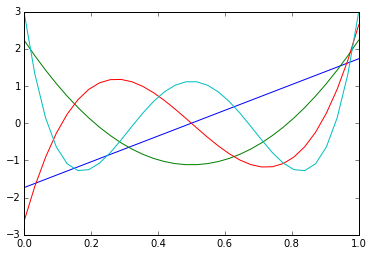

In [39]:
t = sym.symbols('t')
p0 = t
p1 = t**2
#print(p0,p1)
#sym.integrate(p0*p1,(t,0,1))
print scalar_prod(p0,p1)

# 1+0*t: is a trick because I want all the list to be symbolic
Pd = [1+0*t]

for k in range(1,5):
    s = 0
    for j in range(k):
        s += scalar_prod(t**k, Pd[j])/scalar_prod(Pd[j],Pd[j])*Pd[j]
    pd = t**k - s
    # Let's normalize the vectors so they become orthonormal
    pd = pd/sym.sqrt(scalar_prod(pd,pd)) 
    Pd.append(pd)
    
print Pd

M = []

for i in range(5):
    row = []
    for j in range(5):
        row.append(scalar_prod(Pd[i],Pd[j]))
    M.append(row)
   

#print type(M)
#print M.dot(v)
#v = sym.Matrix([[t],[t**2],[1]])
#M = sym.Matrix(M)
#print type(M)
#print M 
#print M.dot(v)
#v = sym.ones(3,1)

x = np.linspace(0,1,2**5)

for p in Pd:
    if p != 1.:
        fs = sym.lambdify(t,p,'numpy')
        _ = pl.plot(x,fs(x))



In [21]:
mm = ['a',1]*3
print mm

['a', 1, 'a', 1, 'a', 1]


## Theorem

Le $q$ be nonzero polynomial of degree $n+1$ and $\omega(x)$ a positive weight function, s. t.:

$$
\int_a^b x^k q(x)\, \omega(x) = 0, \quad k = 0,\ldots, n
$$

If $x_i$ are zeros of $q(x)$, then:

$$
\int_a^b f(x)\, \omega(x)\approx \sum_{i=0}^nw_i\, f(x_i)
$$

with:

$$
w_i = \int_a^b l_i(x)\, \omega(x)
$$

is exact for all polynomials of degree at most $2n+1$. Here $l_i(x)$ are the usual Lagrange interpolation polynomials.

**Proof:** assume $f(x)$ is a polynomial of degree at most $2n+1$ and show:
$$
\int_a^b f(x)\, \omega(x) = \sum_{i=0}^nw_i\, f(x_i).
$$
Usign the polynomial division we have:
$$
\underbrace{f(x)}_{2n+1} = \underbrace{q(x)}_{n+1}\, \underbrace{p(x)}_{n} + \underbrace{r(x)}_{n}.
$$
By taking $x_i$ as zeros of $q(x)$ we have:
$$
f(x_i) = r(x_i)
$$
Now:
$$
\int_a^b f(x)\, \omega(x) = \int_a^b [q(x)\, p(x) + r(x)]\, \omega(x)
$$
$$
 = \underbrace{\int_a^b q(x)\, p(x) \, \omega(x)}_{=0} + \int_a^b r(x)\, \omega(x)
$$
Since $r(x)$ is a polynomial of order $n$ this is exact:

$$
\int_a^b f(x)\, \omega(x) = \int_a^b r(x)\, \omega(x) = \sum_{i=0}^nw_i\, r(x_i)
$$

But since we chose $x_i$ such that $f(x_i) = r(x_i)$, we have:

$$
\int_a^b f(x)\, \omega(x) = \int_a^b r(x)\, \omega(x) = \sum_{i=0}^nw_i\, f(x_i) 
$$

This completes the proof.

## Legendre Polynomial

Two term recursion, to obtain the same orthogonal polynomials above (defined between [-1,1]), normalized to be one in $x=1$:

$$
(n+1) p^{n+1}(x) = (2n+1)\, x\, p^n(x) - n\, p^{n-1}(x)
$$

[1.0, t, 1.5*t**2 - 0.5, t*(2.5*t**2 - 1.5), 4.375*t**4 - 3.75*t**2 + 0.375, t*(7.875*t**4 - 8.75*t**2 + 1.875)]


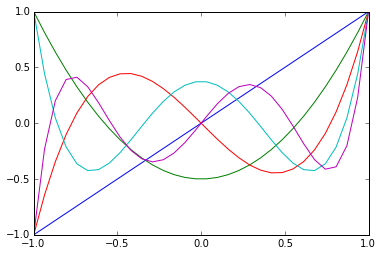

In [43]:
Pk = [1.,t]
for n in range(1,5):
    pk = ((2*n +1)*t*Pk[n] - n*Pk[n-1])/(n+1.)
    Pk.append(sym.simplify(pk))

print Pk

x = np.linspace(-1,1,2**5)

for p in Pk:
    if p != 1.:
        fs = sym.lambdify(t,p,'numpy')
        _ = pl.plot(x,fs(x))
        

In our proof we selected to evaluate $x_i$ at the zeros of the legendre polynomials, this is why we need to evaluate the zeros of the polynomials.

In [47]:
#print type(Pk[2])
p = sym.poly(Pk[2])
#print type(p)
print p.real_roots()
print p.nroots() # numerical


#for p in Pk:
    

[-sqrt(3)/3, sqrt(3)/3]
[-0.577350269189626, 0.577350269189626]


$$
w_i = \int_{-1}^{1} l_i(x)
$$

[1.0, 1.0]
[-0.866025403784439*t + 0.5, 0.866025403784439*t + 0.5]


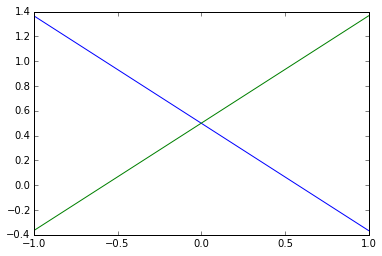

In [51]:
q = sym.poly(Pk[2]).nroots()

Ln = [1. for i in range(len(q))]
print Ln

for i in range(len(q)):
    for j in range(len(q)):
        if i != j:
            Ln[i] *= (t - q[j])/(q[i] - q[j])
            
print Ln

x = np.linspace(-1,1,2**5)


for p in Ln:
    if p != 1.:
        fs = sym.lambdify(t,p,'numpy')
        _ = pl.plot(x,fs(x))
                        


In [57]:
for l in Ln:
    print(sym.integrate(l,(t,-1,1))) 

1.00000000000000
1.00000000000000


### Hint
Proiezione usando polinomi LEGENDRE (f,v_i)

# Now let's get Numerical

From now on I work on the $[0,1]$ interval, becouse i like it this way :)



In the previus section we explored what sympbolically was happening, now we implement things on the computer. We saw how important are the legendre plynomials. Here a little documentation on that. I pont it out not because you need to read it all, but because I would like you get some aquitance with this criptic documentation pages [doc](https://docs.scipy.org/doc/numpy/reference/generated/numpy.polynomial.legendre.legroots.html#numpy.polynomial.legendre.legroots).

The problem we aim at solving is finding the coefficents $p_j$ such that:
$$
(v_j,v_i) p^j = (f,v_i),\quad \forall v_i\in V.
$$
Remind in this section the einstein notation holds.

We can expand the compact scalar product notation:
$$
p^j \int_0^1 v_i\, v_j = \int_0^1 f\, v_i,\quad \forall v_i\in V.
$$

We consider $V = \mathrm{span}\{l_i\}$. Our problem becomes:
$$
p^j \int_0^1 l_i\, l_j = \int_0^1 f\, l_i,\quad \mathrm{for}\ i = 0,\ldots,\mathtt{deg}
$$
Let's focus on mass matrix:
$$
\int_0^1 l_i(x)\, l_j(x) = \sum_k l_i(x_k)\, w_k\, l_j(x_k) = 
$$

$$
=
\left(
\begin{array}{c c c c}
l_0(x_0) & l_0(x_1) & \ldots & l_0(x_q) \\
l_1(x_0) & l_1(x_1) & \ldots & l_1(x_q) \\
 & \ldots & \ldots  & \\
l_n(x_0) & l_n(x_1) & \ldots & l_n(x_q) \\
\end{array}
\right)
\left(
\begin{array}{c c c c}
w_0 &   0 & \ldots & 0 \\
  0 & w_1 & \ldots & 0 \\
   & \ldots & \ldots  & \\
  0 &   0 & \ldots & w_q \\
\end{array}
\right)
\left(
\begin{array}{c c c c}
l_0(x_0) & l_1(x_0) & \ldots & l_n(x_0) \\
l_0(x_1) & l_1(x_1) & \ldots & l_n(x_1) \\
 & \ldots & \ldots  & \\
l_0(x_q) & l_1(x_q) & \ldots & l_n(x_q) \\
\end{array}
\right)
= B\, W\, B^T
$$

A piece of curiosity, how the the two functions to find theros in two different ways

In [59]:
coeffs = np.zeros(3) 
coeffs[-1] = 1.
print leg.legroots(coeffs)


[-0.57735027  0.57735027]


In [61]:
def lg_set(q):
    n = q.shape[0]
    L = [n_poly.Polynomial.fromroots(\
            [xj for xj in q if xj != q[i]]) for i in range(n)]
    L = [L[i]/L[i](q[i]) for i in range(n)]
    return L

[Polynomial([  1.        ,  -8.33333333,  23.33333333, -26.66666667,  10.66666667], [-1.,  1.], [-1.,  1.]), Polynomial([ -0.        ,  16.        , -69.33333333,  96.        , -42.66666667], [-1.,  1.], [-1.,  1.]), Polynomial([   0.,  -12.,   76., -128.,   64.], [-1.,  1.], [-1.,  1.]), Polynomial([ -0.        ,   5.33333333, -37.33333333,  74.66666667, -42.66666667], [-1.,  1.], [-1.,  1.]), Polynomial([  0.        ,  -1.        ,   7.33333333, -16.        ,  10.66666667], [-1.,  1.], [-1.,  1.])]


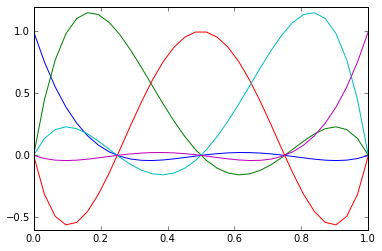

In [76]:
deg = 4

int_p = np.linspace(0,1,deg+1)

L = lg_set(int_p)

print L

x = np.linspace(0,1,2**5)

for p in L:
    _ = pl.plot(x,p(x))

differenza fra le roots "simboliche" e non

In [86]:
Nq = 5
p,w = leg.leggauss(Nq)

p = .5*p + .5
w = .5*w
print p, w

[ 0.04691008  0.23076534  0.5         0.76923466  0.95308992] [ 0.11846344  0.23931434  0.28444444  0.23931434  0.11846344]


In [87]:
B = np.zeros((0,Nq))
for l in L:
    B = np.vstack([B,l(p)])
    
#print B
#pl.plot(B.T)
W = np.diag(w)
print W

[[ 0.11846344  0.          0.          0.          0.        ]
 [ 0.          0.23931434  0.          0.          0.        ]
 [ 0.          0.          0.28444444  0.          0.        ]
 [ 0.          0.          0.          0.23931434  0.        ]
 [ 0.          0.          0.          0.          0.11846344]]


Recall:
$$
B\, W\, B^T p = B W f
$$

$$
B\, W\, B^T = 
\left(
\begin{array}{c c c c}
l_0(x_0) & l_0(x_1) & \ldots & l_0(x_q) \\
l_1(x_0) & l_1(x_1) & \ldots & l_1(x_q) \\
 &  & \ddots  & \\
l_n(x_0) & l_n(x_1) & \ldots & l_n(x_q) \\
\end{array}
\right)
\left(
\begin{array}{c c c c}
w_0 &   0 & \ldots & 0 \\
  0 & w_1 & \ldots & 0 \\
   &  & \ddots  & \\
  0 &   0 & \ldots & w_q \\
\end{array}
\right)
\left(
\begin{array}{c c c c}
l_0(x_0) & l_1(x_0) & \ldots & l_n(x_0) \\
l_0(x_1) & l_1(x_1) & \ldots & l_n(x_1) \\
 & & \ddots  & \\
l_0(x_q) & l_1(x_q) & \ldots & l_n(x_q) \\
\end{array}
\right)
$$

In [88]:
f = lambda x: np.sin(2*np.pi*x)
g = B.dot(W.dot(f(p)))

print g.shape

(5,)


In [ ]:
p = np.linalg.solve(M,g)

$$
B\, W\, f = 
\left(
\begin{array}{c c c c}
l_0(x_0) & l_0(x_1) & \ldots & l_0(x_q) \\
l_1(x_0) & l_1(x_1) & \ldots & l_1(x_q) \\
 & \ldots & \ldots  & \\
l_n(x_0) & l_n(x_1) & \ldots & l_n(x_q) \\
\end{array}
\right)
\left(
\begin{array}{c c c c}
w_0 &   0 & \ldots & 0 \\
  0 & w_1 & \ldots & 0 \\
   & \ldots & \ldots  & \\
  0 &   0 & \ldots & w_q \\
\end{array}
\right)
\left(
\begin{array}{c}
f(x_0) \\
f(x_1) \\
\vdots\\
f(x_q) \\
\end{array}
\right)
$$

In [89]:
def get_interpolating_function(LL,ui):
    def func(LL,ui,x):
        acc = 0
        for L,u in zip(LL,ui):
            #print(L,u)
            acc+=u*L(x)
        return acc
    return lambda x : func(LL,ui,x)